In [45]:
import numpy as np
# from info import Info
import pandas
import json
from pandas import DataFrame

In [46]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

In [47]:
import seaborn as sns
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [48]:
PATH = 'C:/Users/Rachel/Documents/local/pyVis/'

In [49]:
def draw_scatter(dot_positions, colors, markers, name='foo', tag='unknown'):
    a = dot_positions[:, 0]
    b = dot_positions[:, 1]
    plt.figure(dpi=1000)
    for i in range(0,len(dot_positions)):
        plt.scatter(a[i],b[i],c=colors[i],s=10,marker=markers[i],alpha=0.5)
    plt.title('{} {}'.format(name, tag))
    plt.savefig('{}-{}.pdf'.format(PATH+name,tag), format='pdf')

In [50]:
def tsne(data):
    data_embedded = TSNE(n_components=2).fit_transform(data) # data.shape = (n_samples, n_components)
    return data_embedded

def pca(data):
    data_embedded = PCA(n_components=2).fit_transform(data) # data.shape = (n_samples, n_components)
    return data_embedded

def umap(data):
    data_embedded = UMAP().fit_transform(data) # data.shape = (n_samples, n_components)
    return data_embedded

In [52]:
filename = 'embedding_results_share_hidden_last_dense'
data = pandas.read_json(PATH+filename+'.json')
data[::100]

,Instrument,Artist,Music File Name,Starting Index:,Ending Index,Interval,Dataset,Embedding
0,Zheng,WangWei,01GaoShanLiuShui-m.npy,10309,10889,20,training,"[0.0, 0.0, 0.0, 32182494.0, 32695910.0, 0.0, 0..."
100,Zheng,HanTinggui,01GaoShanLiuShui-m.npy,587,1167,20,test,"[0.0, 0.0, 0.0, 62105628.0, 60021660.0, 0.0, 0..."
200,Zheng,HanTinggui,02ShuYun-m.npy,2527,3107,20,test,"[0.0, 0.0, 0.0, 46095584.0, 46685344.0, 0.0, 0..."
300,Zheng,HanTinggui,03JunMaBenTi-m.npy,6209,6789,20,training,"[0.0, 0.0, 0.0, 94060328.0, 95957136.0, 0.0, 0..."
400,Zheng,HanTinggui,04XiangYin-m.npy,8518,9098,20,training,"[0.0, 0.0, 0.0, 110186024.0, 106610968.0, 0.0,..."
...,...,...,...,...,...,...,...,...
32000,BambooFlute,Compilations,08WindyRiver-m.npy,1177,1757,20,training,"[0.0, 0.0, 0.0, 68178160.0, 65950536.0, 0.0, 0..."
32100,BambooFlute,Compilations,10TheSunShiningOnTheParmirs-m.npy,6182,6762,20,test,"[0.0, 0.0, 0.0, 72872616.0, 73844680.0, 0.0, 0..."
32200,BambooFlute,Compilations,09ACamelCaravan-m.npy,133,713,20,test,"[0.0, 0.0, 0.0, 68265344.0, 69061888.0, 0.0, 0..."
32300,BambooFlute,Compilations,11EmbroiderSmallBags-m.npy,4255,4835,20,training,"[0.0, 0.0, 0.0, 97362352.0, 98541376.0, 0.0, 0..."


In [54]:
n_data = data.shape[0]
n_per_song = data[data['Music File Name'] == data['Music File Name'][0]].count()[0]
STEP = 1
n_song = n_data//n_per_song
# embed = np.array(data['Embedding'].to_list()[::STEP])
embed = np.array(data[data['Dataset']=='test']['Embedding'].to_list())
# embed = np.array([np.array(e) for e in embed])
n_per_song, embed.shape, embed[0],embed[len(embed)-1], embed

(400,
 (6500, 32),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.42771300e+06,
        3.45967000e+06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.32651618e-02, 0.00000000e+00, 1.74772675e+06, 1.21898100e+06,
        0.00000000e+00, 5.22949094e+05, 0.00000000e+00, 0.00000000e+00,
        6.89433375e+05, 0.00000000e+00, 5.79304550e+06, 3.63894850e+06,
        0.00000000e+00, 1.15021988e+06, 5.43549700e+06, 0.00000000e+00,
        3.61200342e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.19456445e+04, 0.00000000e+00, 0.00000000e+00, 6.46661520e-02]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92175180e+07,
        1.95292680e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.87797749e-02, 0.00000000e+00, 9.85121400e+06, 6.88786350e+06,
        0.00000000e+00, 2.89092700e+06, 0.00000000e+00, 0.00000000e+00,
        3.92266225e+06, 0.00000000e+00, 3.25042320e+07, 2.05812600e+07,
        0.00000000e+00, 6.54001300e+06, 3.0

14

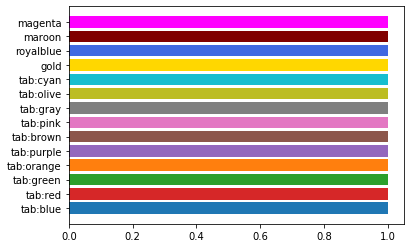

In [40]:
palette = ['tab:blue','tab:red','tab:green','tab:orange','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
add = ['gold','royalblue', 'maroon','magenta']
palette.extend(add)
plt.barh(np.array(range(len(palette))),np.ones(len(palette)),color=palette,tick_label=palette)
len(palette)

In [41]:
data['Instrument'].value_counts()

Zheng          15900
Erhu            7000
Pipa            5700
BambooFlute     3900
Name: Instrument, dtype: int64

In [42]:
list_inst = data['Instrument'].unique().tolist()
dict_data = {}
for inst in list_inst:
    lst = data[data['Instrument']==inst]['Artist'].unique().tolist()
    dic = {lst[i]: i for i in range(len(lst))}
    dict_data[inst] = dic

# dict_data

In [43]:
colors = []
markers = []
for i in range(0,len(data),STEP):
#     m = dict_inst[data['Instrument'][i]]
    inst = data['Instrument'][i]
    artist = data['Artist'][i]
    idx_c = dict_data[inst][artist]
    idx_m = list_inst.index(inst)
    markers.append(['o','x', '+', '^'][idx_m])
    colors.append(palette[idx_c])
len(markers), len(colors)

(32500, 32500)

In [ ]:
embed_tsne = tsne(embed)
embed_pca = pca(embed)
embed_umap = umap(embed)

In [ ]:
draw_scatter(embed_tsne, colors, markers, filename, 'tsne')

In [ ]:
draw_scatter(pca(embed), colors, markers, filename, 'pca')

In [ ]:
draw_scatter(umap(embed), colors, markers, filename, 'umap')

In [ ]:
pc_dict = {i: embed[:,i] for i in range(len(embed[0]))}
pc_df = pandas.DataFrame.from_dict(pc_dict)
pc_df['Song'] = data['Music File Name'].to_list()[::STEP]
plt.figure(dpi=1000)
ax = pandas.plotting.parallel_coordinates(pc_df, 'Song', alpha=0.1)
ax.get_legend().remove()
plt.title('{} PCoords'.format(filename))
plt.savefig('{}-pc.pdf'.format(PATH+filename), format='pdf')

In [ ]:
df = pandas.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
pandas.plotting.parallel_coordinates(df, 'variety')
plt.show()


<BarContainer object of 10 artists>

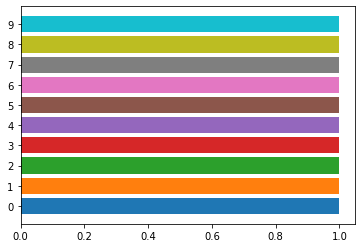

In [34]:
current_palette = sns.color_palette()
current_palette
plt.barh(np.array(range(len(current_palette))),np.ones(len(current_palette)),color=current_palette,tick_label=range(len(current_palette)))